In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.drop(columns = ['PassengerId', 'Name', 'Ticket'],inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [5]:
train_df.dropna(subset = ['Cabin', 'Age'], inplace = True)
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [6]:
train_df.shape

(185, 9)

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.675676,1.189189,35.829297,0.459459,0.470270,78.696712
std,0.469392,0.512763,15.679356,0.642456,0.752122,75.931898
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,48.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


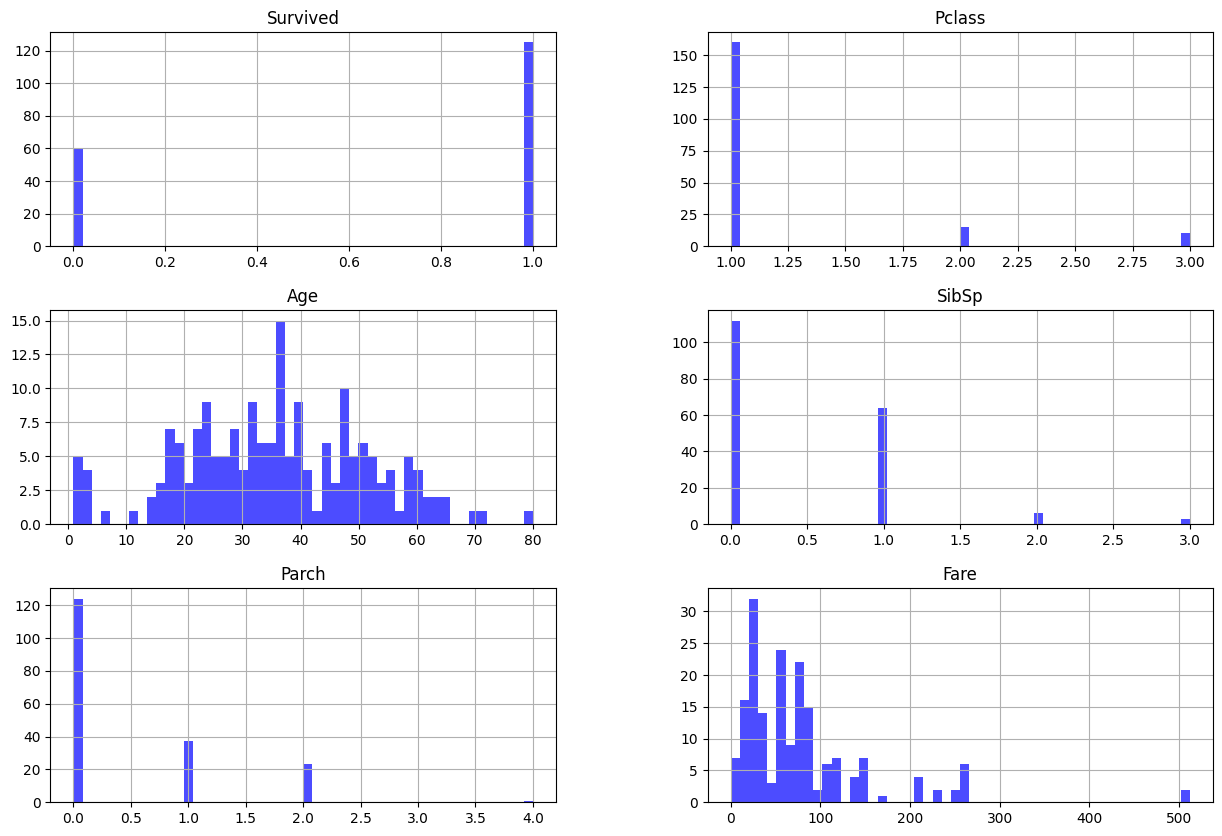

In [8]:
train_df.hist(bins=50, figsize=(15,10), color='b', alpha=0.7)
plt.show()

In [9]:
# Let's check survival rate
train_df.info()
train_df.dropna(subset = ['Embarked'], inplace= True)

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  185 non-null    int64  
 1   Pclass    185 non-null    int64  
 2   Sex       185 non-null    object 
 3   Age       185 non-null    float64
 4   SibSp     185 non-null    int64  
 5   Parch     185 non-null    int64  
 6   Fare      185 non-null    float64
 7   Cabin     185 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.5+ KB


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [11]:
survivors = train_df.loc[train_df.Survived == 1]["Survived"]
print("Number of Survivoes", survivors.count())
print("Number of non-survivors", (train_df.Survived.count() - survivors.count()))

Number of Survivoes 123
Number of non-survivors 60


In [12]:
# Let's now focus on Pclass
train_df.Pclass.describe()

count    183.000000
mean       1.191257
std        0.515187
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Pclass, dtype: float64

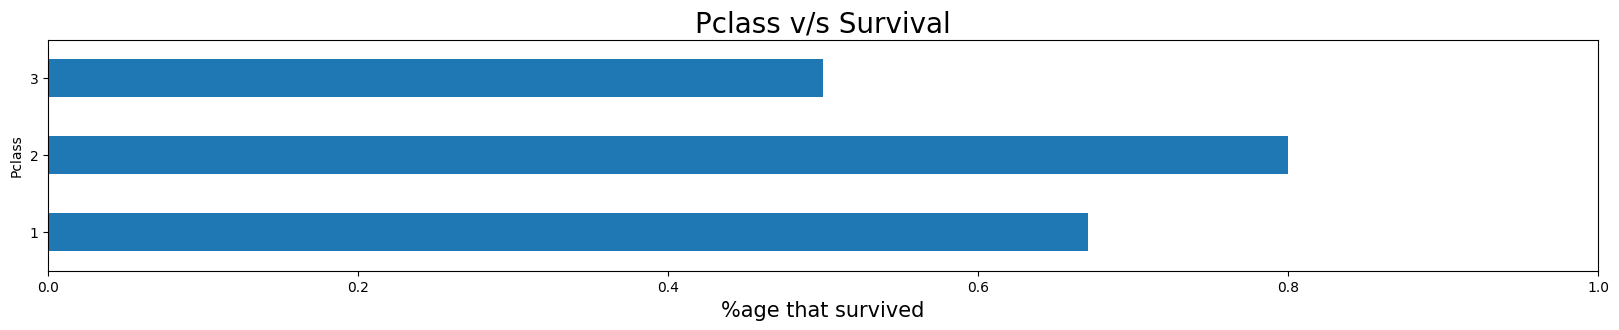

In [13]:
plt.figure(figsize=(20,3))
(train_df.Pclass[train_df.Survived == 1].value_counts()/train_df.Pclass.value_counts()).plot.barh(stacked=True)
plt.title('Pclass v/s Survival', fontsize=20)
plt.xlabel('%age that survived', fontsize=15)
plt.xlim(0,1)
plt.show()

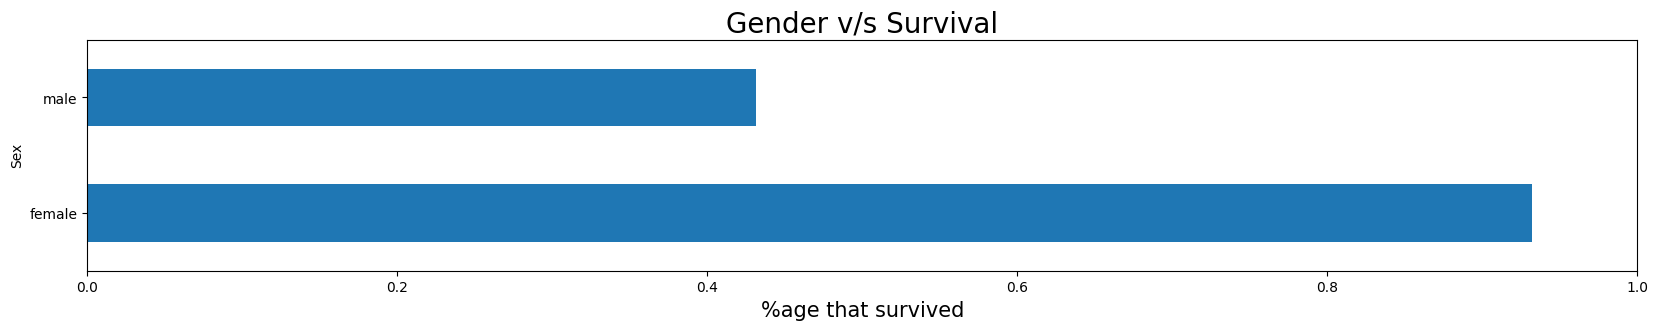

In [14]:
plt.figure(figsize=(20,3))
(train_df.Sex[train_df.Survived==1].value_counts()/train_df.Sex.value_counts()).plot.barh(stacked=True)
plt.title('Gender v/s Survival', fontsize=20)
plt.xlabel('%age that survived', fontsize=15)
plt.xlim(0,1)
plt.show()

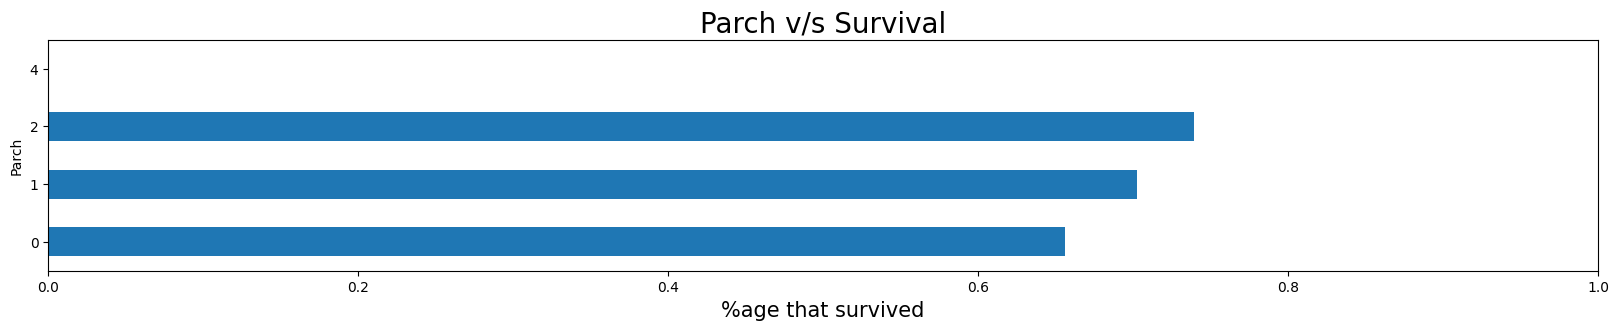

In [15]:
plt.figure(figsize=(20,3))
(train_df.Parch[train_df.Survived==1].value_counts()/train_df.Parch.value_counts()).plot.barh(stacked=True)
plt.title('Parch v/s Survival', fontsize=20)
plt.xlabel('%age that survived', fontsize=15)
plt.xlim(0,1)
plt.show()

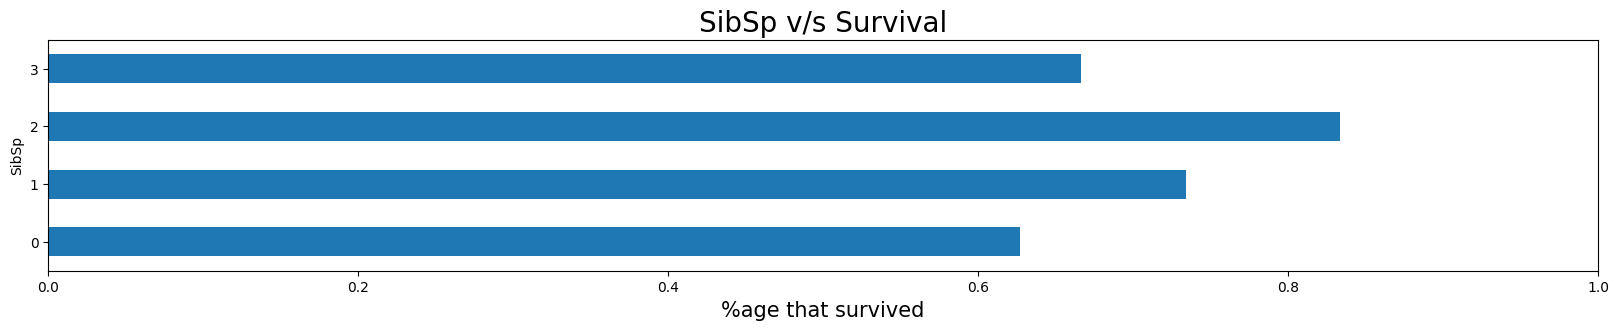

In [16]:
plt.figure(figsize=(20,3))
(train_df.SibSp[train_df.Survived==1].value_counts()/train_df.SibSp.value_counts()).plot.barh(stacked=True)
plt.title('SibSp v/s Survival', fontsize=20)
plt.xlabel('%age that survived', fontsize=15)
plt.xlim(0,1)
plt.show()

In [17]:
train_df.SibSp.describe()

count    183.000000
mean       0.464481
std        0.644159
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: SibSp, dtype: float64

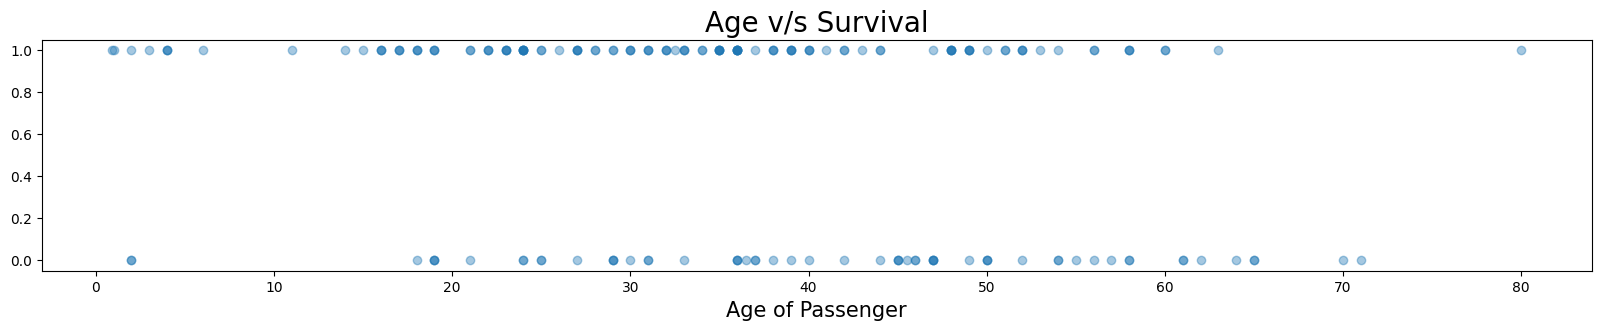

In [18]:
plt.figure(figsize=(20,3))
plt.scatter(train_df.Age, train_df.Survived, alpha=0.4)
plt.title('Age v/s Survival', fontsize=20)
plt.xlabel('Age of Passenger', fontsize=15) 
plt.show()

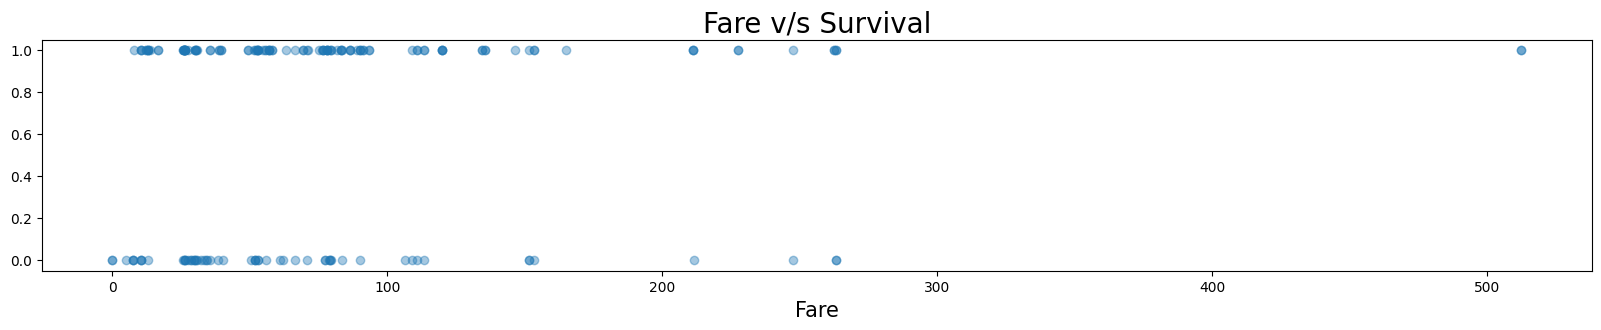

In [19]:
plt.figure(figsize=(20,3))
plt.scatter(train_df.Fare, train_df.Survived, alpha=0.4)
plt.title('Fare v/s Survival', fontsize=20)
plt.xlabel('Fare', fontsize=15) 
plt.show()

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.306514 -0.103592  0.047496 -0.315235
Age    -0.306514  1.000000 -0.156162 -0.271271 -0.092424
SibSp  -0.103592 -0.156162  1.000000  0.255346  0.286433
Parch   0.047496 -0.271271  0.255346  1.000000  0.389740
Fare   -0.315235 -0.092424  0.286433  0.389740  1.000000


<Axes: >

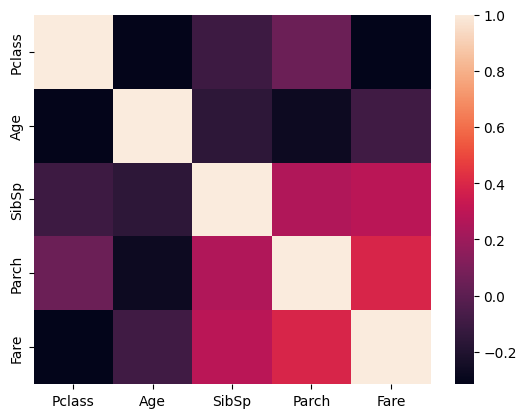

In [20]:
numeric_df = train_df[['Pclass', 'Age', 'SibSp', 'Parch', "Fare"]]
print(numeric_df.corr())
sns.heatmap(numeric_df.corr())

In [21]:
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare', 'Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,41.350000,64.048262,0.450000,1.216667,0.366667
1,32.905854,85.821107,0.487805,1.178862,0.512195


In [22]:
train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives
1,1,1,female,38.0,1,0,71.2833,C85,C,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
10,1,3,female,4.0,1,1,16.7000,G6,S,2
11,1,1,female,58.0,0,0,26.5500,C103,S,0


In [23]:
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
X = pd.get_dummies(train_df[features])

X_test = pd.get_dummies(test_df[features])
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test_imputed)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
